In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the datasets
file_paths = {
    "1850": "data/1850-1880 Censuses of Manufacturing/1850StateSamples.xlsx",
    "1860": "data/1850-1880 Censuses of Manufacturing/1860StateSamples.xlsx",
    "1870": "data/1850-1880 Censuses of Manufacturing/1870StateSamples.xlsx",
    "1880": "data/1850-1880 Censuses of Manufacturing/1880StateSamples.xlsx"
}

# Sheet names corresponding to each year
sheet_names = {
    "1850": "1850ST",
    "1860": "1860ST",
    "1870": "1870ST",
    "1880": "1880ST"
}

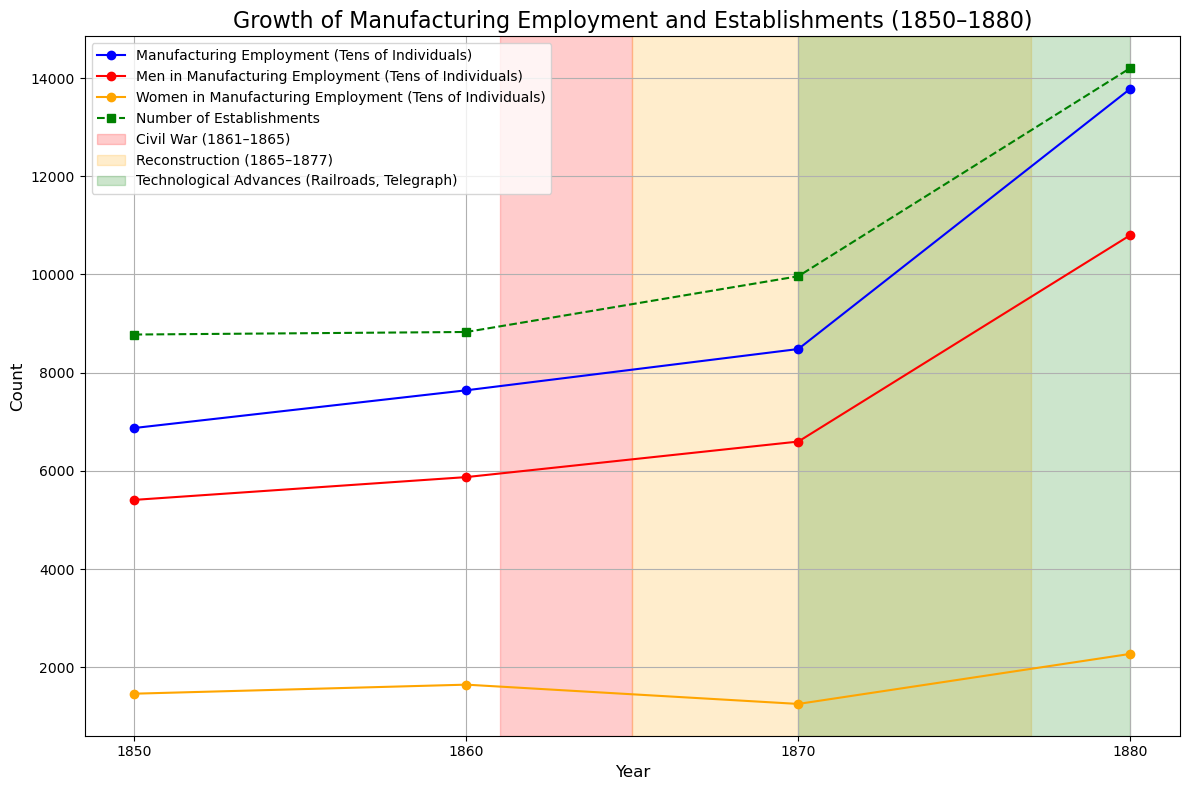

In [2]:
# Initialize dictionaries to store totals
employment_totals = {}
establishment_totals = {}
men_employment_totals = {}
women_employment_totals = {}

# Load datasets and compute totals for each year
for year in file_paths.keys():
    # Load the data
    data = pd.read_excel(file_paths[year], sheet_name=sheet_names[year])
    
    # Calculate total employment (MEN + WOMEN + CHILDREN)
    total_employment = data[["MEN", "WOMEN", "CHILDREN"]].fillna(0).sum(axis=1).sum()
    total_men_employment = data['MEN'].fillna(0).sum()
    total_women_employment = data['WOMEN'].fillna(0).sum()
    
    # Count the number of establishments (each row represents one establishment)
    total_establishments = len(data)
    
    # Store results
    employment_totals[int(year)] = total_employment
    establishment_totals[int(year)] = total_establishments
    men_employment_totals[int(year)] = total_men_employment
    women_employment_totals[int(year)] = total_women_employment
    

# Sort years and corresponding data
years = sorted(employment_totals.keys())
employment_values = [employment_totals[year] / 10 for year in years]  # Scale employment to tens
men_employment_values = [men_employment_totals[year] / 10 for year in years]
women_employment_values = [women_employment_totals[year] / 10 for year in years]
establishment_values = [establishment_totals[year] for year in years]

# Create the dual-line graph
plt.figure(figsize=(12, 8))

# Plot employment (scaled)
plt.plot(years, employment_values, marker='o', linestyle='-', color='blue', label="Manufacturing Employment (Tens of Individuals)")
plt.plot(years, men_employment_values, marker='o', linestyle='-', color='red', label="Men in Manufacturing Employment (Tens of Individuals)")
plt.plot(years, women_employment_values, marker='o', linestyle='-', color='orange', label="Women in Manufacturing Employment (Tens of Individuals)")

# Plot establishments
plt.plot(years, establishment_values, marker='s', linestyle='--', color='green', label="Number of Establishments")

# Add annotations for key historical events
plt.axvspan(1861, 1865, color='red', alpha=0.2, label="Civil War (1861–1865)")  # Shading for Civil War (1861-1865)
plt.axvspan(1865, 1877, color='orange', alpha=0.2, label="Reconstruction (1865–1877)")  # Shading for Reconstruction (1865-1877)
plt.axvspan(1870, 1880, color='green', alpha=0.2, label="Technological Advances (Railroads, Telegraph)")  # Technological advances in 1870s-1880s

# Add labels, title, and legend
plt.title("Growth of Manufacturing Employment and Establishments (1850–1880)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(years)
plt.tight_layout()

# Display the plot
plt.show()